In [43]:
import random
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt

# https://qmplus.qmul.ac.uk/pluginfile.php/2665145/mod_resource/content/1/160355141_Habib_Wahab_MTH6138_IFS.pdf

In [44]:
def generate_image(n, fns, probs, startPoint):

    # Create vector of points (number of iterations)
    x = np.zeros(n)
    y = np.zeros(n)

    x[0] = startPoint[0]
    y[0] = startPoint[1]

    # Randomly select functions to be applied using probabilities given
    transforms = random.choices(fns, probs, k=n)

    # Generate the transformed points
    for i in range(n):

        next = transforms[i](np.array([x[i - 1], y[i - 1]]))

        x[i] = next[0]
        y[i] = next[1]
    
    return x, y


Drawing Barsley Fern using IFS

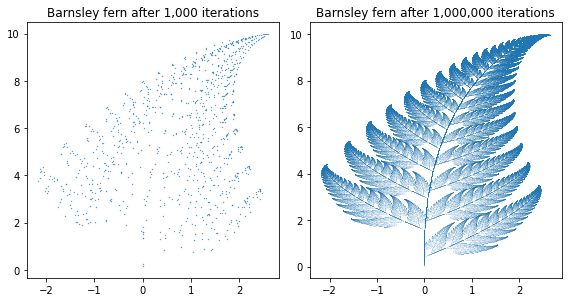

In [70]:
# Define transformations

def f_1(point):
    matrix = np.array([[0.00, 0.00], [0.00, 0.16]])
    return matrix.dot(point)

def f_2(point):
    matrix = np.array([[0.85, 0.04], [-0.04, 0.85]])
    return matrix.dot(point) + np.array([0.00, 1.60])

def f_3(point):
    matrix = np.array([[0.20, -0.26], [0.23, 0.22]])
    return matrix.dot(point) + np.array([0.00, 1.60])

def f_4(point):
    matrix = np.array([[-0.15, 0.28], [0.26, 0.24]])
    return matrix.dot(point) + np.array([0.00, 0.44])

fns = [f_1, f_2, f_3, f_4]
probabilities = [0.01, 0.85, 0.07, 0.07]

x_thousand, y_thousand = generate_image(1000, fns, probabilities, np.array([0, 0]))
x_mil, y_mil = generate_image(1000000, fns, probabilities, np.array([0, 0]))

plt.subplots(1, 2, figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.scatter(x_thousand, y_thousand, s=0.1)
plt.title("Barnsley fern after 1,000 iterations")

plt.subplot(2, 2, 2)
plt.scatter(x_mil, y_mil, s=0.0001)
plt.title("Barnsley fern after 1,000,000 iterations")

plt.tight_layout()
plt.show()

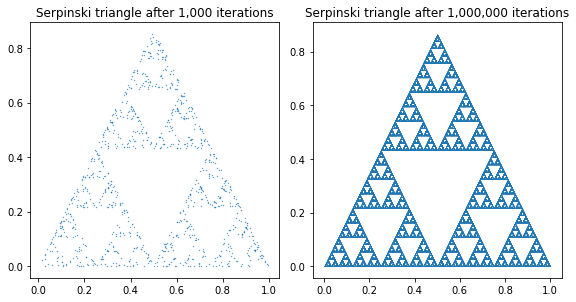

In [71]:
# Define transformations

def f_1(point):
    return np.array([point[0]/2, point[1]/2])

def f_2(point):
    return np.array([(0.5 + point[0])/2, (sqrt(3/4) + point[1])/2])

def f_3(point):
    return np.array([(1 + point[0])/2, point[1]/2])


fns = [f_1, f_2, f_3]
probabilities = [1, 1, 1]

x_thousand, y_thousand = generate_image(1000, fns, probabilities, np.array([0, 0]))
x_mil, y_mil = generate_image(1000000, fns, probabilities, np.array([0, 0]))

plt.subplots(1, 2, figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.scatter(x_thousand, y_thousand, s=0.1)
plt.title("Serpinski triangle after 1,000 iterations")

plt.subplot(2, 2, 2)
plt.scatter(x_mil, y_mil, s=0.0001)
plt.title("Serpinski triangle after 1,000,000 iterations")

plt.tight_layout()
plt.show()